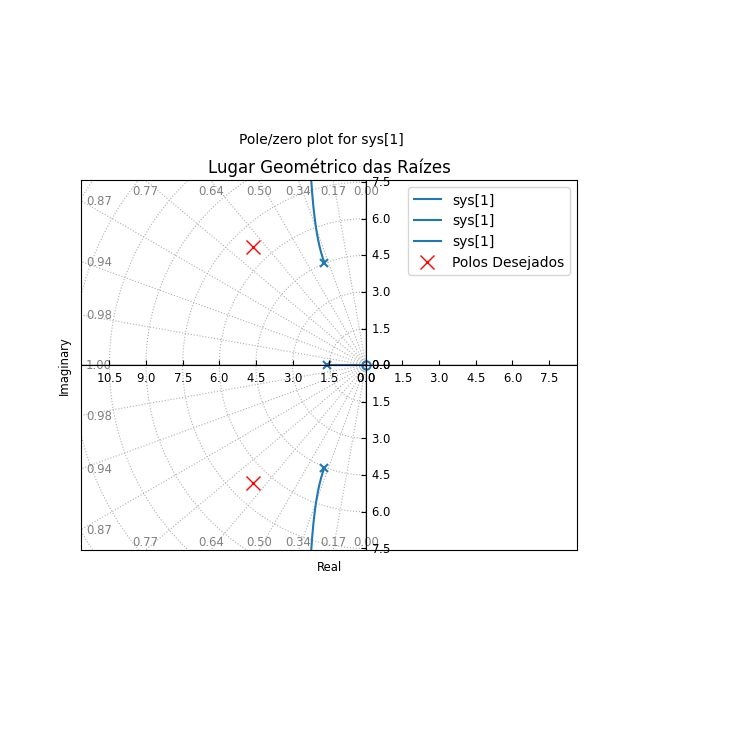

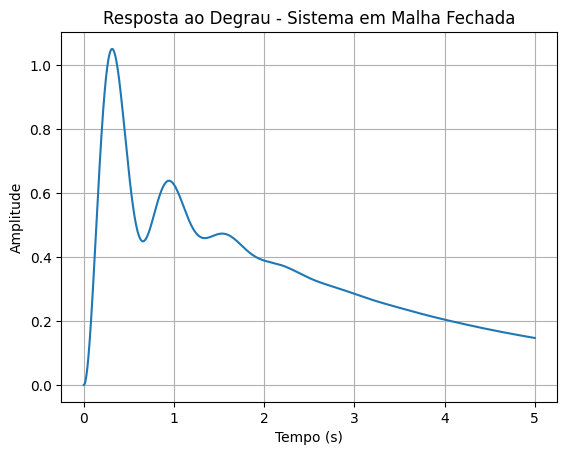

In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Função de transferência original
num = [22, 0]
den = [1, 5, 26, 33]
G = control.tf(num, den)

# Especificações de desempenho
ts = 1.0  # Tempo de acomodação (segundos)
Mp = 0.05  # Sobressinal máximo (5%)

# Calculando o coeficiente de amortecimento e a frequência natural
zeta = -np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2)
wn = 4.6 / (zeta * ts)

# Calculando os polos dominantes desejados
sigma = zeta * wn
wd = wn * np.sqrt(1 - zeta**2)
pd1 = -sigma + 1j * wd
pd2 = -sigma - 1j * wd

# Plotando o LGR
plt.figure()
control.root_locus(G, grid=True)
plt.plot(np.real(pd1), np.imag(pd1), 'x', markersize=10, color='red', label='Polos Desejados')
plt.plot(np.real(pd2), np.imag(pd2), 'x', markersize=10, color='red')
plt.legend()
plt.title('Lugar Geométrico das Raízes')
plt.show()

# Calculando o ganho K para os polos desejados
rlist, klist = control.root_locus(G, plot=False, return_kvect=True)
idx = np.argmin(np.abs(rlist - pd1))
K = klist[idx]

# Função de transferência do controlador
Gc = control.tf(K, 1)

# Sistema em malha fechada
sys_cl = control.feedback(G * Gc, 1)

# Plotando a resposta ao degrau do sistema em malha fechada
t = np.linspace(0, 5, 1000)
_, y = control.step_response(sys_cl, T=t)

plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()